# Write your first ML model

Whether or not this is actually your first model, we are going to take a look at the
famous MNIST data set of handwritten digits. We are going to use a few different ML libs for this.

## Notebook basics
- Use Enter and Escpace to toggle in and out of cells.
- When you are out you can use 'a' and 'b' to insert a new cell above or below.
- Or you can delete a cell with 'dd'.
- You can run the current cell with shift enter (works in both modes).
- You may prefer alt enter which runs cell and creates a new cell after.

## H2O
Let's start our journey by launching a local H2O cluster with one node.

In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_171"; OpenJDK Runtime Environment (build 1.8.0_171-8u171-b11-0ubuntu0.16.04.1-b11); OpenJDK 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from /usr/local/lib/python3.5/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp731704kl
  JVM stdout: /tmp/tmp731704kl/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp731704kl/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,2 months and 5 days
H2O cluster name:,H2O_from_python_unknownUser_89mksi
H2O cluster total nodes:,1
H2O cluster free memory:,3.450 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


## Cheats
Run the cell below to enable skeletons, hints and cheats.
To later use these run skeleton('id'), hint('id') or cheat('id') in any cell.

In [2]:
from cheat import *

### Exercise (andy)

Take a quick look at the output from h2o.init() above. Anything particularly interesting?

### Exercise (mia)

It is time to import some data into our H2O cluster. There are two data files in
the notebook workdirectory.
- Find them and import them into H2O. (use hint if you have trouble finding the method name.)
- View your result X by putting X last in a cell and run the cell.
- Run X.show() and display(X).
- See if you can view X in the Flow UI.

In [3]:
test = h2o.import_file("data/mnist/mnist.test.csv.gz")
train = h2o.import_file("data/mnist/mnist.train.csv.gz")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


### Exercise (sam)
Find the target column of the two imported frames and convert its datatype to enum.
The conversion is done by the 'asfactor' method. To select a column from a dataframe use square brackets df\[...\]. What goes between brackets can be a column name, number, or a list, however not all combinations will work when assigning columns.

In [4]:
train[-1] = train[-1].asfactor()
test[-1] = test[-1].asfactor()

### Exercise (anne)

Often one will split off a part of training data into a validation set.
The validation set serves as a proxy for testing models 'in the wild'.
Scores measured on the training set are not reliable as many algorithms produce
perfect or near perfect training scores.
Split the training frame into two parts: train (80% of rows) and valid (remaining 20%).

In [5]:
train, valid = train.split_frame([0.8])
display(valid.head(3))
display(train.head(3))

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,210,253,205,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,252,252,252,229,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213,252,252,252,253,212,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,105,105,105,123,253,253,253,253,255,253,156,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,252,252,252,252,252,252,252,252,253,252,252,231,164,18,0,0,0,0,0,0,0,0,0,0,0,0,0,208,252,252,252,252,252,252,252,252,253,252,252,252,252,74,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,91,202,254,254,254,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,60,225,253,253,253,253,253,241,96,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,135,253,253,253,253,253,253,253,253,253,253,32,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,216,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,254,162,40,148,185,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,127,252,181,133,233,254,254,226,39,0,0,0,0,0,0,0,0,0,0,0


## Ploting images

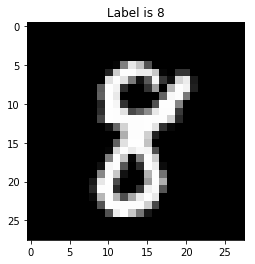

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# converts to pandas dataframe (if pandas is installed)
test_pd = test.as_data_frame()
pixels = test_pd.iloc[:,list(range(0,28*28))]
labels = test_pd.iloc[:,28*28]

def draw_pixels(pixels, labels, num):
    data = np.array(pixels.iloc[num], dtype='uint8')
    data = data.reshape((28, 28))
    plt.title('Label is {label}'.format(label=labels.iloc[num]))
    plt.imshow(data, cmap='gray')
    plt.show()
    
draw_pixels(pixels, labels, 0)

## Finally Machine Learning

We begin with they laziest way, throwing the data into a off the shelf algorithm. Nevertheless, the next exercise is a little bigger than before.

### Exercise (jessie)
- Create a random forest model using H2O with default settings for everything. In python objects are created by a method call to the class object, which you can think of as a constructor. Moreover, omitted (named) parameters are automatically given default values. 

Comment:
In general, the parameters of the "constructor" can be ordered or named, like so:

obj = NameOfClass(param1 , param2, ... , named_param1=value1, named_param2=value2, ...)

All the parameters are an ordered list, and all non-named parameters come first. Named parameters can be used without name if it is clear from order which parameter is being set.


In [7]:
from h2o.estimators import H2ORandomForestEstimator
rf = H2ORandomForestEstimator()

### Exercise (alfred)
- Train the model. Run help(rf.train) and read about the needed parameters. Use x,y,training_frame and validation_frame, but skip the rest.
- To check that you have provided the right target column, inspect it manually with display or show to confirm that the values are digits 0-9.
- While your model trains, go into FLOW and click Model -> List all models -> Click your model. Finally you can click refresh to see stats update continuously.
- Take a glance at logloss, variable importance, hitratio (see below), and more. How do these differ between training set and validation set?

In [8]:
x = list(range(28*28))
y = 28*28
rf.train(x,y,training_frame=train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


### Hitratio
Hitratio is a bit hard to find info about;
1-hitratio: for each image we let the model output 1 prediction it is the most confident about, if the prediction matches the true target, that image counts as a hit. 1-hitratio is then \[ #images hit \]/\[#total images\].

If we would compute 2-hitratio, then we let the model take two guesses at each image, and if it got either of the guesses correct, then that image counts as a hit, and so on.

## Test performance

### Exercise (rick)
Using estimator.model_performance(df) lets you measure various performance metrics on a data frame df without going into the FLOW ui. Check the random forest's performance on train, validation and test sets.

In [9]:
rf.model_performance(train)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.01038133615060846
RMSE: 0.10188884213008047
LogLoss: 0.0729927746956098
Mean Per-Class Error: 0.00025243777462588985
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,3,4,5,6,7,8,9,Error,Rate
4745.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 4,745"
0.0,5394.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 5,394"
0.0,0.0,4753.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0014706,"7 / 4,760"
0.0,1.0,0.0,4939.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0002024,"1 / 4,940"
0.0,0.0,0.0,0.0,4654.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 4,654"
0.0,0.0,0.0,0.0,0.0,4344.0,0.0,0.0,0.0,0.0,0.0,"0 / 4,344"
0.0,0.0,0.0,0.0,0.0,0.0,4719.0,0.0,0.0,0.0,0.0,"0 / 4,719"
0.0,0.0,0.0,0.0,0.0,0.0,0.0,5030.0,0.0,0.0,0.0,"0 / 5,030"
0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4671.0,0.0,0.0006418,"3 / 4,674"
0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4772.0,0.0002095,"1 / 4,773"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9997502
2,0.9999792
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0
10,1.0


In [10]:
rf.model_performance(valid)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.0689903632517169
RMSE: 0.26266016685389676
LogLoss: 0.2501548451506442
Mean Per-Class Error: 0.03618690866501186
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,3,4,5,6,7,8,9,Error,Rate
1162.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,8.0,1.0,0.0135823,"16 / 1,178"
1.0,1328.0,8.0,3.0,3.0,0.0,2.0,1.0,1.0,1.0,0.0148368,"20 / 1,348"
9.0,4.0,1139.0,9.0,5.0,0.0,4.0,5.0,22.0,1.0,0.0492487,"59 / 1,198"
0.0,1.0,15.0,1132.0,0.0,6.0,5.0,12.0,9.0,11.0,0.0495382,"59 / 1,191"
3.0,2.0,6.0,0.0,1141.0,1.0,8.0,1.0,4.0,22.0,0.0395623,"47 / 1,188"
5.0,4.0,5.0,8.0,4.0,1035.0,9.0,1.0,3.0,3.0,0.0389972,"42 / 1,077"
6.0,3.0,1.0,0.0,1.0,9.0,1175.0,0.0,4.0,0.0,0.0200167,"24 / 1,199"
1.0,5.0,7.0,0.0,5.0,1.0,0.0,1195.0,2.0,19.0,0.0323887,"40 / 1,235"
3.0,7.0,8.0,13.0,4.0,9.0,8.0,1.0,1117.0,7.0,0.0509771,"60 / 1,177"
7.0,1.0,0.0,14.0,14.0,5.0,0.0,15.0,6.0,1114.0,0.0527211,"62 / 1,176"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9641514
2,0.9870477
3,0.9933985
4,0.9960726
5,0.9972425
6,0.9978274
7,0.9980781
8,0.9983288
9,0.9983288
10,1.0000001


In [11]:
rf.model_performance(test)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.06641070512291601
RMSE: 0.2577027456642944
LogLoss: 0.2402819134606966
Mean Per-Class Error: 0.03519838055400976
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,3,4,5,6,7,8,9,Error,Rate
968.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,5.0,1.0,0.0122449,12 / 980
0.0,1124.0,3.0,1.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0096916,"11 / 1,135"
7.0,0.0,989.0,9.0,3.0,0.0,2.0,9.0,12.0,1.0,0.0416667,"43 / 1,032"
1.0,0.0,5.0,971.0,0.0,4.0,2.0,13.0,10.0,4.0,0.0386139,"39 / 1,010"
0.0,0.0,3.0,0.0,947.0,0.0,5.0,0.0,4.0,23.0,0.0356415,35 / 982
5.0,1.0,1.0,11.0,2.0,853.0,8.0,2.0,6.0,3.0,0.0437220,39 / 892
5.0,3.0,0.0,0.0,3.0,6.0,935.0,0.0,6.0,0.0,0.0240084,23 / 958
1.0,4.0,20.0,3.0,3.0,0.0,0.0,981.0,2.0,14.0,0.0457198,"47 / 1,028"
4.0,0.0,4.0,11.0,6.0,4.0,6.0,3.0,930.0,6.0,0.0451745,44 / 974
5.0,7.0,2.0,14.0,11.0,3.0,2.0,6.0,6.0,953.0,0.0555005,"56 / 1,009"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9651
2,0.9889
3,0.9948000
4,0.9974000
5,0.9982001
6,0.9987001
7,0.9987001
8,0.9989001
9,0.9989001
10,1.0


## Deep Learning
I mean why not...

### Exercise
Repeat the procedure above but change H2ODeepLearningEstimator to H2ODeepLearningEstimator.

- Which is better out of the box for this data set?
- Which took longer to train?
- How was the gap between validation and test errors?

In [12]:
from h2o.estimators import H2ODeepLearningEstimator
dl = H2ODeepLearningEstimator()
x = list(range(28*28))
y = 28*28
dl.train(x,y,training_frame=train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


## Downloading POJO/MOJO
H2O models can be downloaded in two Java compatible forms. 

## Goodbye H2O

In [13]:
h2o.cluster().shutdown()

H2O session _sid_88bc closed.


### Keras on Tensorflow
So far we have not exploited at all the position of pixels in the plane. It is widely known that convolutional networks (CNNs) are a great way share weights among translated descriptors. This is a fancy way of saying that we can keep the number of variables (weights) much smaller by encoding assumptions about images in the structure of the model. For example, if we have a 5x5 filter that can detect horizontal edges in one part of the image, we have reason to believe it has the same ability applied in a different part of the image.

TensorFlow is a Google library for graph computations (and neural networks as a special but important case). TensorFlow is popular also because it provides a general backend so that any or most neural networks can be implemented on top of it and it is possible to export models and run them in a JVM.

Keras is a high level library that can use TensorFlow as a backend, but makes life much easier for the programmer.

Hence we will use Keras-TF to train a CNN.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


### Loading data as pandas Dataframe
Pandas dataframes are similar to H2O's, but run in a single python instance*. Compared to H2O's dataframes,
pandas offers far more operations and seems to be more mature as of today. By default pandas will try
to guess the schema of csv files by parsing the first row. As our data does not have a header, we have to specify that.

*The DASK project provides dataframes distributed on a cluster which are backed by pandas dataframes.

In [15]:
train = pd.read_csv('data/mnist/mnist.train.csv.gz', header=None)
test = pd.read_csv('data/mnist/mnist.test.csv.gz', header=None)

### Exercise (kate)
- Create dataframes X_train and X_test which consist of all columns except the target column. Run help(pd.DataFrame.drop) and find out what arguments you need to provide.
- Create Series Y_train and Y_test which consist of the target column only. Run help(pd.DataFrame.loc) and read the first example and the one on 'Set value for an entire column' to get a feel for slicing and indexing. However iloc is more convenient here. (There is also help on iloc but not as extensive.)
- Delete train and test to save memory.

In [16]:
Y_train = train.iloc[:,28*28]
X_train = train.drop(28*28, axis = 1)
Y_test = test.iloc[:,28*28]
X_test = test.drop(28*28, axis = 1)
del train, test

### Rescaling
Rescaling the input to be between 0 and 1 help the CNN to converge faster and better.
Without this, learning size of weights and thereby gradients will be unbalanced across layers and we would need smaller learning rates, increasing the risk for numerical errors.

In [17]:
X_train = X_train/255
X_test = X_test/255

### Reshaping
Some frameworks for training NNs, including Keras assume that input is a tensor of higher dimension than 2 (which would be matrix). The input tensor here should be num_examples x height x width x channels. Number of channels is 1 since we have gray-scale pictures, and the -1 means that numpy should figure out how many rows.
Reshaping thus reshapes our n x 28^2 tensor to a n x 28 x 28 x 1 tensor.
Finally we are using the 2D geometri of the data.

In [18]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

### Exercise (charlie)
Since X_train and X_test are now numpy arrays, lets take a look at them. We can use indexing and slicing on numpy objects in a similar way we have done on pandas dataframes, however this is easier and does not require loc and iloc.
- Use the .shape attribute of numpy arrays to find out the shape of part of the tensor which hold the first image.
- Remove the last dimension from this part of the tensor and confirm that the result has shape (28,28).

In [19]:
print(X_test[0].shape)
print(X_test[0][:,:,0].shape)

(28, 28, 1)
(28, 28)


### Label encoding
The targets (or labels as they can be called), have numerical values which seems to indicate that guessing a nearby number is better than guessing a far number. However we only care about guessing right or wrong so that is not the loss function we want. We will therefore apply one-hot encoding to the labels, representing for example the number 3 as \[0,0,3,0,0,0,0,0,0,0\]. This is the expected format of the loss function categorical crossentropy that we will use.

In [20]:
Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes = 10)

### Neural network architecture

An important part of training a neural network is to design an architecture. We will use a feed-forward
architecture https://en.wikipedia.org/wiki/Feedforward_neural_network with convolutional layers as the main components. A classical approach is to intertwine convolutional layers https://en.wikipedia.org/wiki/Convolutional_neural_network with maxpooling layers and finish off with fully connected layers. Moreover, to prevent overfitting (which could happen very easily with the huge number of variables), dropout layers help a great deal.

A part of the network architecture are so called activation functions which are typically stuck between two layers. Activation functions are simply applied on each value (neuron) before being fed into the next layer.

A popular and powerful activation function is the rectified linear unit, or ReLU. https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

### Convolutional layer

A convolutional layer has several filters which can be seen as small matrixes which determine how to average m-by-m pixels of the image into a single value. In Keras this m is called kernel_size and the number of filters is simply 'filters'. Each filter could learn different things, which is why we need more than 1 filter. For example a filter could detect 45 degree lines , or it could detect upper-right-corners.

What is nice about this is that we don't need to tell the algorithm what filters (or features) are important.

When several convolutional (or other layers) are stacked on top of eachother, higher level features can be learned such as arcs of different curvature, or even body parts or cats or dogs.

In this and the following exercises we will build a multi-layer architecture which works well for MNIST. Credit for the exact architecture and parameter values goes to Yassine Ghouzam, however the idea this type of structure, and many other architectures are well-known in the litterature. See for example https://arxiv.org/pdf/1404.7828.pdf

### Exercise (bella)
Add a first convolutional layer with 32 filters, averaging over 5-by-5 pixels, relu activation, correct input_shape and padding ='Same'. Run help(Conv2D) and the cell above to get some info.

The setting for padding makes sure that the image doesn't shrink after convolution.

In [21]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

### Rinse and repeat
Add another identical layer, but do not include input_shape since this is not the first layer.

In [22]:
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))

### Maxpooling
A maxpooling layer divides up the image into k-by-k boxes side by side. Each box gives one node in the layer and the value of that node is simply the maximum of the values in the k-by-k box.

### Exercise (george)
Add a maxpooling layer with 2-by-2 size.

In [23]:
model.add(MaxPool2D(pool_size=(2,2)))

### Dropout
A Dropout layer randomly sets a fraction `rate` of input units to 0 at each update during training time. The random choice is made independently of both neuron and training example.

### Exercise (eric)
Add a dropout layer with 25% rate.

In [24]:
model.add(Dropout(0.25))

### Exercise
- Take a moment to think about how the shape of the input tensor changes as it traverses each of the layers we have added so far.
- Write down the sizes you think are correct.
- When you are done, run the next cell.
- Can you figure out why the first layer has 832 parameters and the next one has 25632? You might think the first one has 800 and the next one has 25600.

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
Total params: 26,464
Trainable params: 26,464
Non-trainable params: 0
_________________________________________________________________


### Exercise (gabby)

- Add another two convolutional layers as before with 64 filters each and size 3-by-3.
- Follow this up by a 2-by-2 maxpooling layer.
- Another 25% dropout.
- Write down what you think the shape of the output is after each layer.
- Take a look at the model summary.

This will amount to 4 new layers.

In [26]:
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
    activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
    activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

### Dense layers
Popular CNN+Maxpooling architectures usually finish off with a few so called dense layers, also called fully connected layers. Each neuron in a fully connected layer has an incomming connection from _every_ neuron in the previous layer. This makes the layer very general but also computationally heavier. The generality means that it could capture features with far reaching dependencies such as "curved arc near top - pointy angle approximately N pixel below and M pixels left" -- useful if you want to find the number two.

The Dense layer assumes that the neurons (or equivalently the output) of the previous layer is flattened into a single line, i.e., the shape should be (NONE, d). (The NONE represents the number-of-images dimension which is not known beforehand.)

Luckily there is a layer for reshaping the previous layer, the Flatten layer. You can create Flatten without any configuring parameters.

### Exercise (may)
- Add a Flatten layer.
- Add a Dense layer with 256 neurons and relu activation.
- Add 50% Dropout.
- Add another Dense layer with 10 units and "softmax" activation.
- Rejoice, all layers are in place.

Why does the last layer have 10 output units?

In [27]:
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

### Softmax explaination
A softmax activation or softmax layer does two things. First it applies the exponential function to each output in the previous layer. Then it rescales each output so that the sum of all outputs is 1.
When the sum of outputs is 1, we can think of the output vector as a probability distribution over a categorical variable. The name softmax comes from the fact that when the exponential function is applied, the maximal value becomes even more dominating so the output vector tends to be close, but not equal to, a vector with a single 1 and the rest of its elements 0.

https://en.wikipedia.org/wiki/Softmax_function

## Optimization and loss
In machine learning the most popular framework for choosing a model from the set of "allowed models" (called hypothesis space), is to first pick some _loss function_, and then solving the optimization problem

pick model that minimizes loss(model,training_data)

In our case the loss will be categorical crossentropy loss. We explain first what the loss is for a single image example where the correct label is n.
Let q_n be the probability our NN outputs for label n. The loss is then -log(q_n).
Thus if the model predicts 0 probability of the correct label (this cannot in fact happen), then the loss is negative infinity. And if the model predicts 1 probability of the correct label, then the loss is 0 which is the best possible value (also doesnt happen).
The loss for the entire training set is then just the total or average loss over all training examples. 

There are many different optimization algorithms for picking the model weights that give the minimal loss, but that is out of the scope of this notebook. We will just try RMSprop.

Links for later reading:

https://en.wikipedia.org/wiki/Cross_entropy

https://en.wikipedia.org/wiki/Gradient_descent

https://en.wikipedia.org/wiki/Stochastic_gradient_descent

https://en.wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp

In [28]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## Run training
When training, i.e. optimization is run, the training set is traversed a number of times, each time is called an epoch. During each epoch groups of training examples are fed to the optimizer. Such a group is called a batch.
When a batch is processed, the optimizer tries to slightly tweak the model parameters to get an improved model.

### Exercise (pat)
- Use model.fit which is described here: https://keras.io/models/model/, or run help(model.fit).
- Needed parameters are x,y,batch_size, epochs, validation_data. Recommended is also verbose=2.
- Save the result of model.fit in a variable called history.

In [35]:
epochs = 2
batch_size = 86
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_test, Y_test), verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
 - 197s - loss: 0.0659 - acc: 0.9811 - val_loss: 0.0365 - val_acc: 0.9895
Epoch 2/2
 - 225s - loss: 0.0553 - acc: 0.9841 - val_loss: 0.0284 - val_acc: 0.9909


## The results

In [36]:
print(history.history)

{'acc': [0.9810833245674769, 0.984099992531538], 'val_acc': [0.9894999949932098, 0.9908999956607819], 'val_loss': [0.03649776451709913, 0.028413377590777236], 'loss': [0.06585266220666235, 0.05529004577247154]}


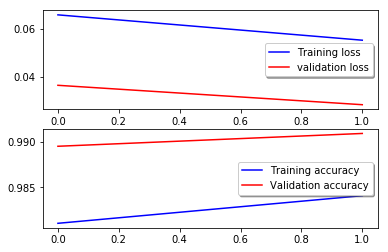

In [37]:
# This only makes sense for at least 2 epochs

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)